In [1]:
import pickle
import matplotlib.pyplot as plt

In [6]:
obj_month_list = [f"{year}{month:02d}" for year in range(1995, 2022) for month in range(1, 13)]

## Plotting for Portfolio

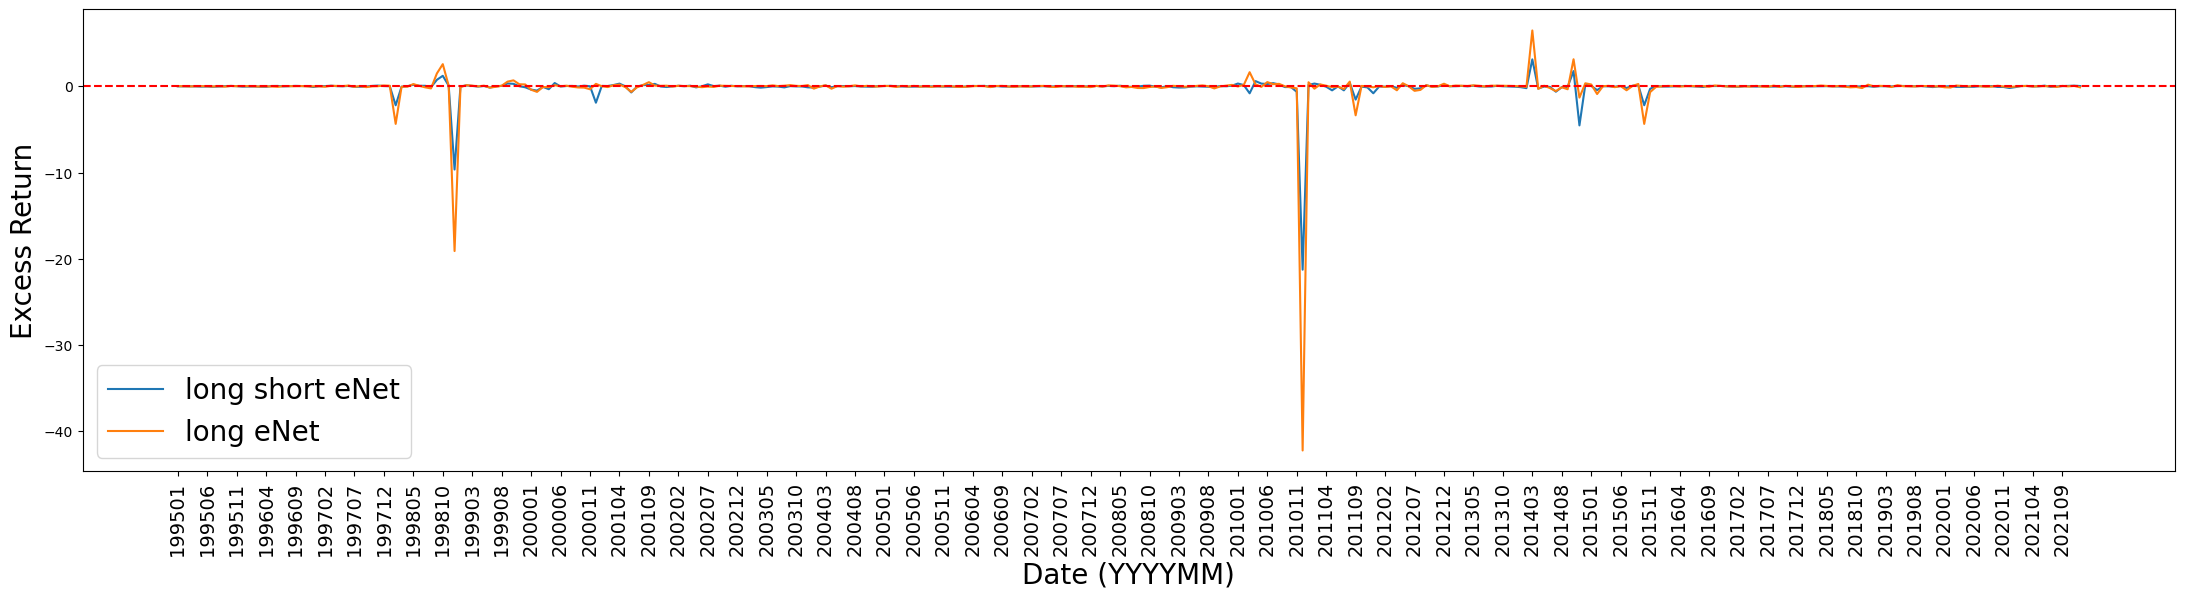

In [7]:
with open("outputs/portfolio/long_short_eNet.pkl", "rb") as f:
    long_short_eNet = pickle.load(f)

with open("outputs/portfolio/long_eNet.pkl", "rb") as f:
    long_eNet = pickle.load(f)


plt.figure(figsize=(27, 6))
plt.plot(obj_month_list, long_short_eNet, label="long short eNet")
plt.plot(obj_month_list, long_eNet, label="long eNet")
plt.axhline(0, color='r', linestyle="--")
# plt.plot(test_months, validation_r2s, label="R^2 in validation years")
plt.xticks(obj_month_list[::5], rotation='vertical', fontsize=14)
plt.xlabel('Date (YYYYMM)', fontsize=20)
plt.ylabel('Excess Return', fontsize=20)
plt.legend(fontsize=20)
plt.show()